In [ ]:
%pip install tensorflow
%pip install split-folders
%pip install matplotlib
%pip install matplotlib
#After this restart the pycharm(ie, close and open pycharm)


  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached grpcio-1.44.0-cp39-cp39-win_amd64.whl (3.4 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.6.0-cp39-cp39-win_amd64.whl (2.8 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (

You should consider upgrading via the 'e:\projects\fake_image_detection\fake_image_detection\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import splitfolders 
input_folder = "Fake_Dataset/"
output = "Dataset" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1)) 

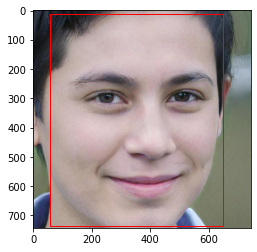

(59, 11, 650, 737)

In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from PIL import Image
# load image from folder
filename = 'Fake_Dataset/Fake_Faces/File_10,001.jpg'

def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()
    return(x,y,x+width,y+height)

detector = MTCNN()
# detect faces in the image
pixels = pyplot.imread(filename)
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (200,200,3),activation = 'relu',padding='same',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
%pip install scipy

  Using cached scipy-1.8.0-cp39-cp39-win_amd64.whl (36.9 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\Projects\Fake_image_detection\Fake_image_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train = datagen.flow_from_directory('Dataset/Train/',
                                    class_mode='binary',
                                    batch_size=64,
                                    target_size=(200,200))

test = datagen.flow_from_directory('Dataset/val/',
                                    class_mode='binary',
                                    batch_size=64,
                                    target_size=(200,200))
history = model.fit_generator(train,validation_data=(test),epochs = 50,steps_per_epoch=len(train),validation_steps=len(test))

Found 14000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


C:\Users\Sunil\AppData\Local\Temp\ipykernel_15208\2928226808.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=(test),epochs = 50,steps_per_epoch=len(train),validation_steps=len(test))


Epoch 1/50
219/219 [==============================] - 945s 4s/step - loss: 0.1493 - accuracy: 0.9474 - val_loss: 0.1304 - val_accuracy: 0.9532
Epoch 2/50
219/219 [==============================] - 906s 4s/step - loss: 0.1004 - accuracy: 0.9639 - val_loss: 0.0709 - val_accuracy: 0.9688
Epoch 3/50
219/219 [==============================] - 905s 4s/step - loss: 0.1098 - accuracy: 0.9608 - val_loss: 0.0923 - val_accuracy: 0.9622
Epoch 4/50
219/219 [==============================] - 17568s 81s/step - loss: 0.0926 - accuracy: 0.9646 - val_loss: 0.1528 - val_accuracy: 0.9355
Epoch 5/50
219/219 [==============================] - 942s 4s/step - loss: 0.0702 - accuracy: 0.9734 - val_loss: 0.0534 - val_accuracy: 0.9762
Epoch 6/50
219/219 [==============================] - 1083s 5s/step - loss: 0.1129 - accuracy: 0.9570 - val_loss: 0.1854 - val_accuracy: 0.9268
Epoch 7/50
219/219 [==============================] - 1020s 5s/step - loss: 0.1010 - accuracy: 0.9613 - val_loss: 0.0667 - val_accuracy: 0

In [6]:
model_json = model.to_json()

with open('model.json','w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

In [7]:
from keras.models import load_model, model_from_json
from PIL import Image
import json
import numpy as np

# Load model from Json file
json_file = open('model.json','r')
loaded_model = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model)
load_model.load_weights('model.h5')

# Load Image
image = Image.open('Dataset/test/Fake_Faces/File_10,028.jpg') ## Test Image Path

im = image.resize((200,200))

im = np.asarray(im)
im = np.reshape(im,(1,im.shape[0],im.shape[1],im.shape[2]))

# Make Prediction
prediction = load_model.predict(im)
if prediction == 1:
  print('Real Face')
else:
  print('Fake Face')

Fake Face
